In [228]:
import pandas as pd
import requests #Pushshift accesses Reddit via an url so this is needed
import json #JSON manipulation
import csv #To Convert final table into a csv file to save to your machine
import time
import datetime
import pandas as pd
import tweepy
import datetime as dt
import nltk
import matplotlib as plt
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
import numpy as np
import nltk
import gensim
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dateutil.parser import parser


In [263]:
df = pd.read_csv('Summanry_db.csv')
read_app = pd.read_csv('reddit_apple.csv')
twitter_app = pd.read_csv('Apple Sentiment.csv')
read_cisco = pd.read_csv('reddit_cisco.csv')
twitter_cisco = pd.read_csv('Cisco Sentiment.csv')
read_google = pd.read_csv('reddit_google.csv')
twitter_google = pd.read_csv('Google Sentiment.csv')
read_fb = pd.read_csv('reddit_fb.csv')
twitter_fb = pd.read_csv('Facebook Sentiment.csv')
read_sony = pd.read_csv('reddit_sony.csv')
twitter_sony = pd.read_csv('Sony Sentiment.csv')
# read_amazon = pd.read_csv('reddit_amazon.csv')
#twitter_amazon = pd.read_csv('Amazon Sentiment.csv')

In [230]:
def Vader(df):
    #updating
    nltk.download('vader_lexicon')
    
    #Initializing Sentiment Analysis of VADER
    sid = SentimentIntensityAnalyzer()
    
    #Filling Nulls
    df = df.fillna('')
    
    #Analysis
    df['Vader'] = df['Title'].apply(lambda cleaned: sid.polarity_scores(cleaned))
    df['compound']  = df['Vader'].apply(lambda score_dict: score_dict['compound'])
    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
    
    #Overall Result
    
    #pos
    try:
        pos = df.get('comp_score').value_counts()[0]
    except IndexError as e:
        pos = 0
    
    #neg
    try:
        neg = df.get('comp_score').value_counts()[1]
    except IndexError as e:
        neg = 0

    #Printing
    print('Positive Percentage : ', pos/(pos+neg)*100)
    print('Negative Percentage : ', neg/(pos+neg)*100)
    
    print(df.get('comp_score').value_counts().plot(kind='bar'))
    
    return df

In [231]:
def spl(x):
    return x.split(' ')[0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  81.88512518409425
Negative Percentage :  18.114874815905743
AxesSubplot(0.125,0.125;0.775x0.755)


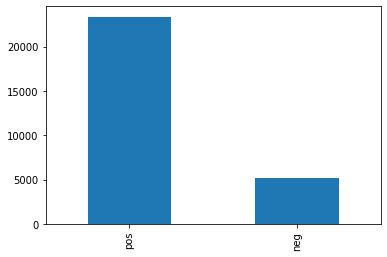

In [197]:
    apple = df
    read_app['Formatted Date'] = read_app['Date'].apply(spl) 
    read_app = Vader(read_app)
    read_app = read_app.groupby('Formatted Date').sum()
    compound = pd.merge(read_app, twitter_app, left_on= 'Formatted Date', right_on='Tweet Datetime', how='outer')
    compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
    dates = apple.get('formatted_date')
    vals = [0 if dates[i] not in read_app else read_app.loc[dates[i]][0] for i in range(apple.shape[0]) ]
    apple['compound'] = vals

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.17256952697885
Negative Percentage :  17.827430473021156
AxesSubplot(0.125,0.125;0.775x0.755)


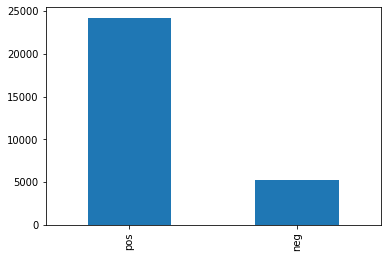

In [217]:
read_app = read_cisco
twitter_app = twitter_cisco
read_app['Formatted Date'] = read_app['Date'].apply(spl) 
read_app = Vader(read_app)
read_app = read_app.groupby('Formatted Date').sum()
compound = pd.merge(read_app, twitter_app, left_on= 'Formatted Date', right_on='Tweet Datetime', how='outer')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
dates = apple.get('formatted_date')

In [219]:
compound.loc[]

,Unnamed: 0,compound_x,Tweet Datetime,Retweets,Follower Count,compound_y,compound
0,202006.0,1.2453,NaN,NaN,NaN,NaN,NaN
1,112966.0,3.4489,NaN,NaN,NaN,NaN,NaN
2,112973.0,0.0000,NaN,NaN,NaN,NaN,NaN
3,228725.0,11.1832,NaN,NaN,NaN,NaN,NaN
4,88354.0,0.0000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1038,NaN,NaN,2020-02-14,8.0,375628.0,0.0000,NaN
1039,NaN,NaN,2020-07-22,14.0,163404.0,0.0000,NaN
1040,NaN,NaN,2021-03-25,18.0,163404.0,0.3612,NaN
1041,NaN,NaN,2021-09-27,2.0,230767.0,-0.1280,NaN


In [235]:
read_cisco

,Unnamed: 0,Title,Date,Vader,compound,comp_score
0,0,How do I inverse apple and amazon?,2017-11-08 21:15:16,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.1779,pos
1,1,investing GENIUS (autistic faggot) makes THOUS...,2017-11-26 08:18:58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,2,blaming Apple for the tekk dip today cuz they ...,2017-11-30 01:04:07,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp...",-0.7003,neg
3,3,"Petition for Apple to repatriate cash, buy Gol...",2017-12-04 08:21:49,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,4,What do you guys think about Tesla stock? Im t...,2017-12-26 16:40:04,"{'neg': 0.046, 'neu': 0.911, 'pos': 0.044, 'co...",-0.0258,neg
...,...,...,...,...,...,...
29444,29444,Cisco Put Options to $40?,2020-12-31 09:44:24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
29445,29445,Cisco?,2021-02-09 12:43:55,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
29446,29446,"Buy ADXS, next to GameShop growth. Thinking ab...",2021-05-20 07:49:54,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.3818,pos
29447,29447,Last week I was down to $52 then I discovered ...,2020-05-14 13:37:37,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.17256952697885
Negative Percentage :  17.827430473021156
AxesSubplot(0.125,0.125;0.775x0.755)


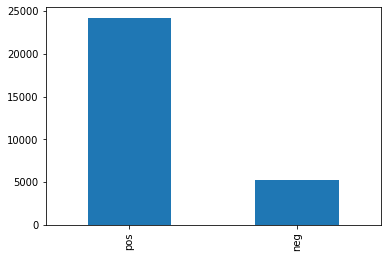

In [240]:
cisco = df[df.get('Company') == 'Cisco']
read_cisco['Formatted Date'] = read_cisco['Date'].apply(spl)
read_cisco = Vader(read_cisco)
read_cisco = read_cisco.groupby('Formatted Date').sum()
compound = pd.merge(read_cisco, twitter_cisco, left_on= 'Formatted Date', right_on  = 'Tweet Datetime')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])]

dates = cisco.get('formatted_date')



In [242]:
read_cisco

,Unnamed: 0,compound
Formatted Date,,
2017-11-08,202006,1.2453
2017-11-11,112966,3.4489
2017-11-15,112973,0.0000
2017-11-23,228725,11.1832
2017-11-26,88354,0.0000
...,...,...
2021-11-01,112910,0.0000
2021-11-02,112917,1.9124
2021-11-04,338793,6.2132


In [246]:
read_cisco.loc['2017-11-08'][0
]

202006.0

In [255]:
z = list(dates)
z[0]

'2017-08-21'

In [249]:
dates[0]

KeyError: 0

In [248]:
vals = []

for i in range(read_cisco.shape[0]):

    if dates[i] in read_cisco:

KeyError: 0

In [258]:
def maker(df, read_app, twitter_app, name):
    apple = df
    read_app['Formatted Date'] = read_app['Date'].apply(spl) 
    read_app = Vader(read_app)
    read_app = read_app.groupby('Formatted Date').sum()
    compound = pd.merge(read_app, twitter_app, left_on= 'Formatted Date', right_on='Tweet Datetime')
    compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
    dates = apple.get('formatted_date')
    dates = list(dates)
    
    vals = [0 if dates[i] not in read_app else read_app.loc[dates[i]] for i in range(apple.shape[0]) ]
    apple['compound'] = vals
    apple.to_csv(name)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.91161796151106
Negative Percentage :  17.08838203848895
AxesSubplot(0.125,0.125;0.775x0.755)


<ipython-input-258-af967e4d6832>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['compound'] = vals


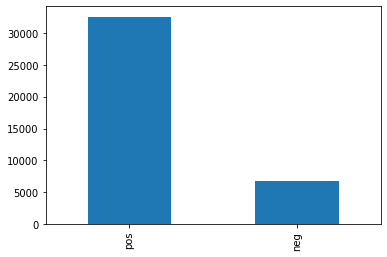

In [264]:
maker(df[df.get('Company') == 'Sony'], read_sony, twitter_sony, 'Sony_final.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  81.88512518409425
Negative Percentage :  18.114874815905743
AxesSubplot(0.125,0.125;0.775x0.755)


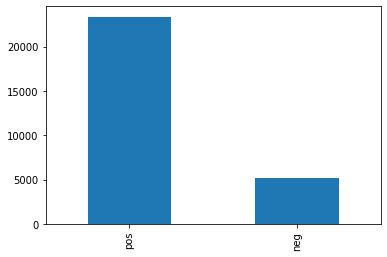

In [153]:
# apple
apple = df[df.get('Company') == 'Apple']
read_app['Formatted Date'] = read_app['Date'].apply(spl) 
read_app = Vader(read_app)
read_app = read_app.groupby('Formatted Date').sum().reset_index()
compound = pd.merge(read_app, twitter_app, left_on= 'Formatted Date', right_on='Tweet Datetime')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
merged_app = pd.merge(apple, compound, left_on = 'formatted_date', right_on = 'Formatted Date', how='inner')
merged_app.to_csv('Final Apple.csv')




In [154]:
apple

,Unnamed: 0,date,high,low,open,close,volume,adjclose,formatted_date,Ticker,Company
0,0,1503322200,39.472500,38.777500,39.375000,39.302502,105474000,37.455002,2017-08-21,AAPL,Apple
1,1,1503408600,40.000000,39.505001,39.557499,39.945000,86418400,38.067291,2017-08-22,AAPL,Apple
2,2,1503495000,40.117500,39.720001,39.767502,39.994999,77596400,38.114941,2017-08-23,AAPL,Apple
3,3,1503581400,40.185001,39.637501,40.107498,39.817501,79275600,37.945782,2017-08-24,AAPL,Apple
4,4,1503667800,40.139999,39.817501,39.912498,39.965000,101920400,38.086349,2017-08-25,AAPL,Apple
...,...,...,...,...,...,...,...,...,...,...,...
1052,1052,1635168600,149.369995,147.619995,148.679993,148.639999,50720600,148.423386,2021-10-25,AAPL,Apple
1053,1053,1635255000,150.839996,149.009995,149.330002,149.320007,60893400,149.102402,2021-10-26,AAPL,Apple
1054,1054,1635341400,149.729996,148.490005,149.360001,148.850006,56094900,148.633087,2021-10-27,AAPL,Apple
1055,1055,1635427800,153.169998,149.720001,149.820007,152.570007,100077900,152.347656,2021-10-28,AAPL,Apple


In [155]:
merged_app

,Unnamed: 0_x,date,high,low,open,close,volume,adjclose,formatted_date,Ticker,Company,Formatted Date,Unnamed: 0_y,compound_x,Tweet Datetime,Retweets,Follower Count,compound_y,compound
0,75,1512570600,42.549999,41.615002,41.875000,42.252499,114240000,40.411072,2017-12-06,AAPL,Apple,2017-12-06,221088,3.3369,2017-12-06,817.0,13097421.0,0.8934,4.2303
1,77,1512743400,42.750000,42.205002,42.622501,42.342499,93420800,40.497147,2017-12-08,AAPL,Apple,2017-12-08,221102,3.2592,2017-12-08,847.0,13097421.0,0.8910,4.1502
2,87,1513953000,43.855000,43.625000,43.669998,43.752499,65397600,41.845699,2017-12-22,AAPL,Apple,2017-12-22,110915,0.0000,2017-12-22,885.0,13097421.0,0.9495,0.9495
3,102,1516199400,44.812500,43.767502,44.037498,44.775002,137547200,42.823650,2018-01-17,AAPL,Apple,2018-01-17,530859,8.9068,2018-01-17,777.0,13097421.0,0.2732,9.1800
4,103,1516285800,45.025002,44.562500,44.842499,44.814999,124773600,42.861893,2018-01-18,AAPL,Apple,2018-01-18,283605,-1.0899,2018-01-18,335.0,13097421.0,0.6688,-0.4211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1050,1634823000,149.639999,147.869995,148.809998,149.479996,61421000,149.262146,2021-10-21,AAPL,Apple,2021-10-21,549500,2.8203,2021-10-21,33.0,11529523.0,0.4019,3.2222
231,1052,1635168600,149.369995,147.619995,148.679993,148.639999,50720600,148.423386,2021-10-25,AAPL,Apple,2021-10-25,219891,-2.5284,2021-10-25,151.0,80568912.0,1.2650,-1.2634
232,1054,1635341400,149.729996,148.490005,149.360001,148.850006,56094900,148.633087,2021-10-27,AAPL,Apple,2021-10-27,109956,0.0000,2021-10-27,607.0,51489803.0,1.1809,1.1809
233,1055,1635427800,153.169998,149.720001,149.820007,152.570007,100077900,152.347656,2021-10-28,AAPL,Apple,2021-10-28,659883,-5.7414,2021-10-28,54.0,39815501.0,1.7839,-3.9575


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.17256952697885
Negative Percentage :  17.827430473021156
AxesSubplot(0.125,0.125;0.775x0.755)


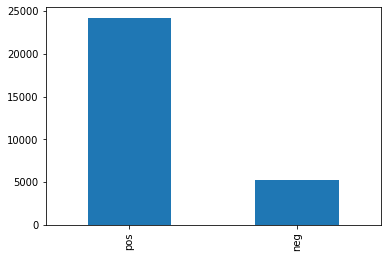

In [156]:
#cisco
apple = df[df.get('Company') == 'Cisco']
read_cisco['Formatted Date'] = read_cisco['Date'].apply(spl) 
read_cisco = Vader(read_cisco)
read_cisco = read_cisco.groupby('Formatted Date').sum().reset_index()
compound = pd.merge(read_cisco, twitter_cisco, left_on= 'Formatted Date', right_on='Tweet Datetime')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
merged_app = pd.merge(apple, compound, left_on = 'formatted_date', right_on = 'Formatted Date')
merged_app.to_csv('Final Cisco.csv')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.60684669359983
Negative Percentage :  17.39315330640017
AxesSubplot(0.125,0.125;0.775x0.755)


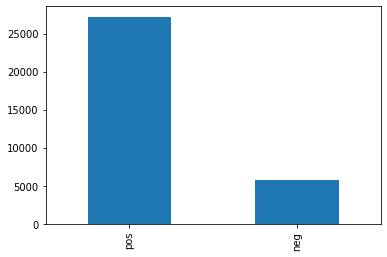

In [120]:
#fb
apple = df[df.get('Company') == 'Facebook']
read_fb['Formatted Date'] = read_fb['Date'].apply(spl) 
read_fb = Vader(read_fb)
read_fb = read_fb.groupby('Formatted Date').sum().reset_index()
compound = pd.merge(read_fb, twitter_fb, left_on= 'Formatted Date', right_on='Tweet Datetime')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
merged_app = pd.merge(apple, compound, left_on = 'formatted_date', right_on = 'Formatted Date')
merged_app.to_csv('Final FB.csv')


In [157]:
merged_app

,Unnamed: 0_x,date,high,low,open,close,volume,adjclose,formatted_date,Ticker,Company,Formatted Date,Unnamed: 0_y,compound_x,Tweet Datetime,Retweets,Follower Count,compound_y,compound
0,1350,1539869400,46.490002,45.150002,46.299999,45.459999,19044600,41.524410,2018-10-18,CSCO,Cisco,2018-10-18,361382,-3.4671,2018-10-18,283.0,13097421.0,0.7283,-2.7388
1,1404,1546957800,43.939999,43.099998,43.570000,43.560001,22071400,40.096973,2019-01-08,CSCO,Cisco,2019-01-08,390474,-6.5240,2019-01-08,16.0,163404.0,0.4404,-6.0836
2,1428,1549981800,48.150002,47.160000,47.270000,47.889999,23909200,44.082733,2019-02-12,CSCO,Cisco,2019-02-12,91700,-0.7189,2019-02-12,229.0,13097421.0,0.9080,0.1891
3,1615,1573137000,48.980000,48.200001,48.610001,48.419998,16717800,45.477718,2019-11-07,CSCO,Cisco,2019-11-07,93492,-5.1457,2019-11-07,0.0,293616.0,0.4588,-4.6869
4,1665,1579703400,49.529999,49.040001,49.279999,49.070000,15186000,46.427036,2020-01-22,CSCO,Cisco,2020-01-22,303660,4.5402,2020-01-22,8.0,375628.0,-0.2960,4.2442
5,1687,1582554600,45.680000,44.000000,45.000000,44.000000,35295900,41.630112,2020-02-24,CSCO,Cisco,2020-02-24,851634,13.3063,2020-02-24,1.0,293616.0,0.0000,13.3063
6,1700,1584019800,35.820000,33.000000,34.500000,33.200001,51855300,31.411814,2020-03-12,CSCO,Cisco,2020-03-12,588840,7.6811,2020-03-12,12.0,163404.0,0.0000,7.6811
7,1703,1584451800,36.250000,33.599998,34.700001,35.500000,41572400,33.587929,2020-03-17,CSCO,Cisco,2020-03-17,212226,0.0000,2020-03-17,5.0,163404.0,0.0000,0.0000
8,1717,1586179800,41.680000,39.779999,40.459999,41.430000,31641400,39.570187,2020-04-06,CSCO,Cisco,2020-04-06,95249,2.9946,2020-04-06,3.0,163404.0,0.0000,2.9946
9,1823,1599226200,41.430000,40.439999,41.200001,40.820000,34867400,39.294693,2020-09-04,CSCO,Cisco,2020-09-04,412328,1.5645,2020-09-04,2.0,293616.0,0.0000,1.5645


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  82.5184066452709
Negative Percentage :  17.481593354729092
AxesSubplot(0.125,0.125;0.775x0.755)


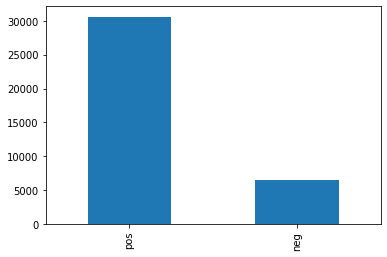

In [121]:
#google
apple = df[df.get('Company') == 'Google']
read_google['Formatted Date'] = read_google['Date'].apply(spl) 
read_google = Vader(read_google)
read_google = read_google.groupby('Formatted Date').sum().reset_index()
compound = pd.merge(read_google, twitter_app, left_on= 'Formatted Date', right_on='Tweet Datetime')
compound['compound'] =[compound.get('compound_x')[i] + compound.get('compound_y')[i] for i in range(compound.shape[0])] 
merged_app = pd.merge(apple, compound, left_on = 'formatted_date', right_on = 'Formatted Date')
merged_app.to_csv('Final Google.csv')


In [122]:
apple

,Unnamed: 0,date,high,low,open,close,volume,adjclose,formatted_date,Ticker,Company
5285,5285,1503322200,928.250000,918.599976,925.770020,920.869995,1301200,920.869995,2017-08-21,GOOGL,Google
5286,5286,1503408600,941.960022,926.169983,926.960022,940.400024,1775100,940.400024,2017-08-22,GOOGL,Google
5287,5287,1503495000,945.429993,935.239990,937.000000,942.580017,1134500,942.580017,2017-08-23,GOOGL,Google
5288,5288,1503581400,946.309998,930.739990,943.710022,936.890015,1294600,936.890015,2017-08-24,GOOGL,Google
5289,5289,1503667800,940.729980,930.099976,939.210022,930.500000,1187300,930.500000,2017-08-25,GOOGL,Google
...,...,...,...,...,...,...,...,...,...,...,...
6337,6337,1635168600,2760.000000,2708.479980,2751.000000,2748.939941,1720600,2748.939941,2021-10-25,GOOGL,Google
6338,6338,1635255000,2801.659912,2766.090088,2785.270020,2786.169922,2461800,2786.169922,2021-10-26,GOOGL,Google
6339,6339,1635341400,2973.000000,2788.100098,2788.100098,2924.350098,4289100,2924.350098,2021-10-27,GOOGL,Google
6340,6340,1635427800,2943.159912,2892.540039,2942.689941,2916.979980,1810300,2916.979980,2021-10-28,GOOGL,Google
